In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def visualize_data(xdata,ydata):
    fig, axes = plt.subplots(len(df.columns),1,figsize=(20,15),dpi=120)
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='blue', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)
    plt.tight_layout()
    plt.show()

In [3]:
def results_viz(rawdata,simdata,features):
    res = {}
    x = [i for i in range(1,1+rawdata.shape[0])]
    for fea in features:
        raw = rawdata[fea]
        sim = simdata[fea]
        res[fea] = [(raw,sim),sum(abs(raw-sim))/len(raw)]
        # visualize 
        plt.figure(figsize=(15,8))
        plt.plot(x, raw, label = 'True value')
        plt.plot(x, sim, label = 'Simulated value')
        plt.xlabel('Time')
        plt.ylabel(fea)
        plt.title(label='True value VS Simultated value in term of feature "{}"'.format(fea))
        plt.legend()
        plt.show()
    
    
    return res

In [8]:
test_raw = pd.read_csv('/Users/robin/Desktop/running_results/cleaned_data.csv')
test_sim = pd.read_excel('/Users/robin/GitLab/thesis/sdm/simulated_results/2012_1D_results.xlsx')

In [9]:
test_raw.head()

Arrival rate1D  Finish rate1D  Num of unique resource1D  \
0              43             31                        39   
1              50             29                        38   
2             107            101                        40   
3              83             85                        42   
4             126            111                        41   

   Process active time1D  Service time per case1D  Time in process per case1D  \
0           10199.383333              3284.688889                  242.842460   
1           10678.516667              3110.885034                  217.928912   
2           20380.683333              2671.339706                  199.810621   
3           18983.550000              2891.513992                  234.364815   
4           29753.266667              2689.066949                  252.146328   

   Num in process case1D  
0                   12.0  
1                   33.0  
2                   39.0  
3                   37.0  
4                   52.0

In [10]:
features =['Finish rate1D','Service time per case1D','Time in process per case1D','Num in process case1D']

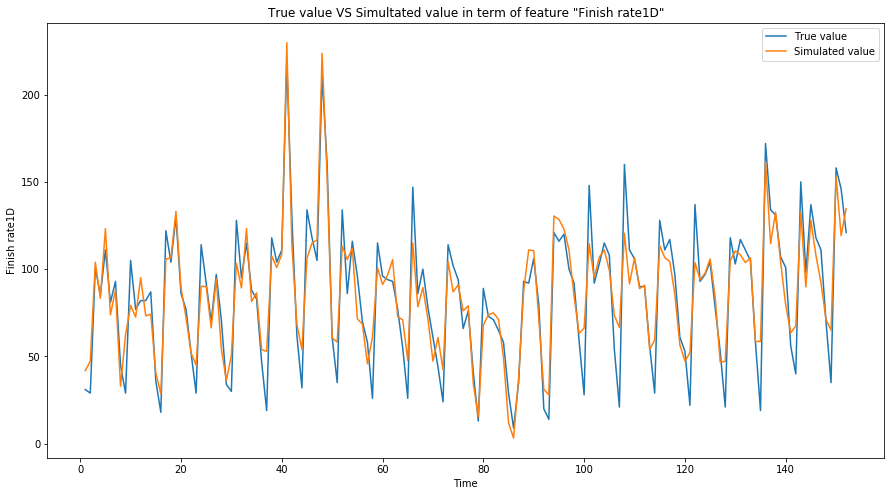

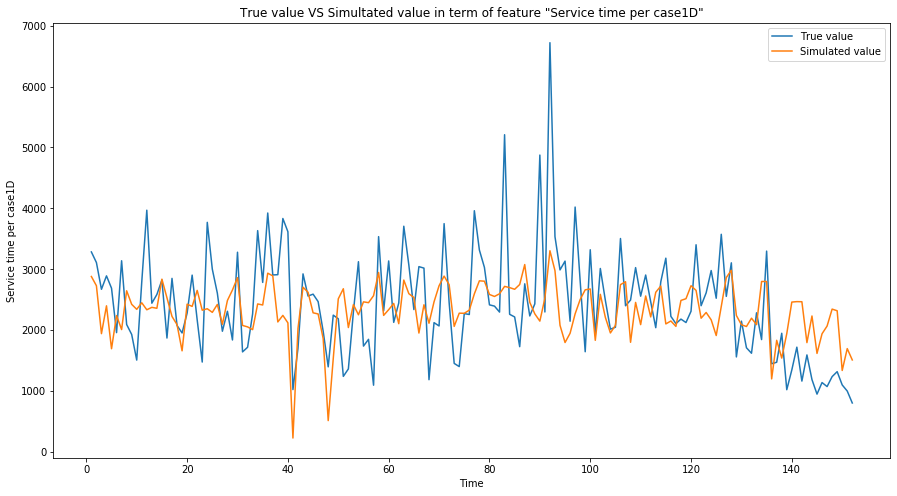

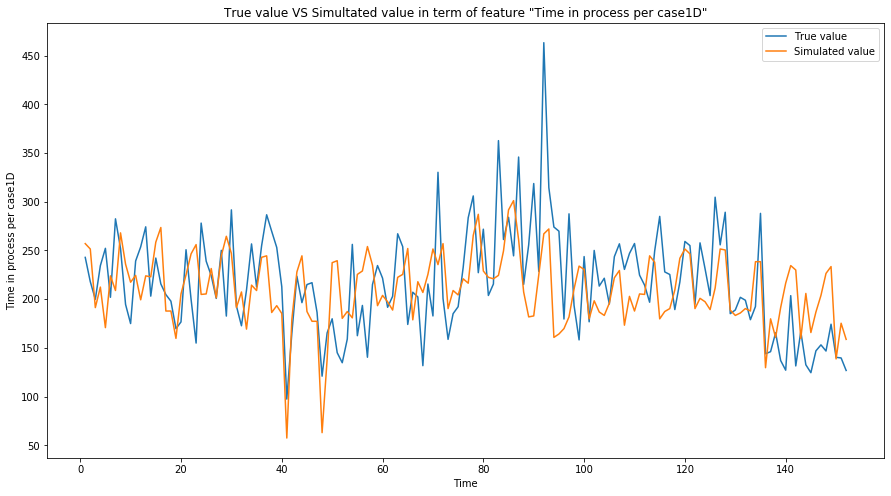

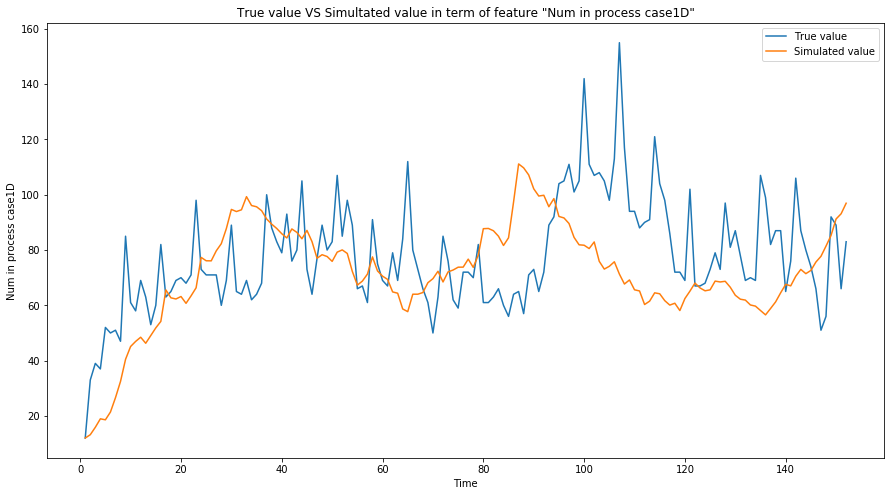

In [11]:
diff_dict = results_viz(test_raw,test_sim,features)

In [12]:
diff_dict

{'Finish rate1D': [(0       31
   1       29
   2      101
   3       85
   4      111
         ... 
   147     70
   148     35
   149    158
   150    146
   151    121
   Name: Finish rate1D, Length: 152, dtype: int64, 0       41.796001
   1       47.320004
   2      103.934998
   3       83.356995
   4      123.188995
             ...    
   147     71.145004
   148     65.039001
   149    153.119995
   150    119.182999
   151    134.625000
   Name: Finish rate1D, Length: 152, dtype: float64), 11.770303061133937],
 'Service time per case1D': [(0      3284.688889
   1      3110.885034
   2      2671.339706
   3      2891.513992
   4      2689.066949
             ...     
   147    1237.405708
   148    1319.004412
   149    1101.123944
   150    1000.468116
   151     804.503435
   Name: Service time per case1D, Length: 152, dtype: float64,
   0      2881.619385
   1      2729.883057
   2      1942.996338
   3      2400.043213
   4      1695.446045
             ...     
   147    2